## Wait times and PMF fitting (early)

### Import modules

In [1]:
from os import path, makedirs
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np
import sys
from utils import * #chiCa functions

### Convert .mat files

In [40]:
file_names = pick_files_multi_session("chipmunk", "*.mat")
converted_files = convert_specified_behavior_sessions(file_names, overwrite=True)

/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:113: UserWarning: Found multisensory trials, assumed synchronous condition
  warnings.warn('Found multisensory trials, assumed synchronous condition')
/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:166: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['Port1In', 'Port1Out', 'Port2In', 'Port2Out', 'Port3In', 'Port3Out',
       'Tup', 'DemonCenterFixationPeriod', 'DemonDidNotChoose',
       'DemonEarlyWithdrawal', 'DemonEarlyWithdrawalPunishment', 'DemonGoCue',
       'DemonInitFixation', 'DemonReward', 'DemonWaitForCenterFixation',
       'DemonWaitForResponse', 'DemonWaitForWithdrawalFromCenter',
       'DemonWrongChoice', 'DemonWrongChoicePunishment', 'FinishTrial',
       'PlayStimulus', 'PreStimPeriod', 'Sync', 'TrialStart',
       'stimulus_m

/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:113: UserWarning: Found multisensory trials, assumed synchronous condition
  warnings.warn('Found multisensory trials, assumed synchronous condition')
/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:166: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['Port1In', 'Port1Out', 'Port2In', 'Port2Out', 'Port3In', 'Port3Out',
       'Tup', 'DemonCenterFixationPeriod', 'DemonDidNotChoose',
       'DemonEarlyWithdrawal', 'DemonEarlyWithdrawalPunishment', 'DemonGoCue',
       'DemonInitFixation', 'DemonReward', 'DemonWaitForCenterFixation',
       'DemonWaitForResponse', 'DemonWaitForWithdrawalFromCenter',
       'DemonWrongChoice', 'DemonWrongChoicePunishment', 'FinishTrial',
       'PlayStimulus', 'PreStimPeriod', 'Sync', 'TrialStart',
       'stimulus_m

/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:113: UserWarning: Found multisensory trials, assumed synchronous condition
  warnings.warn('Found multisensory trials, assumed synchronous condition')
/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:166: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Port1In', 'Port1Out', 'Port2In', 'Port2Out', 'Port3In', 'Port3Out',
       'Tup', 'DemonCenterFixationPeriod', 'DemonDidNotChoose',
       'DemonEarlyWithdrawal', 'DemonEarlyWithdrawalPunishment', 'DemonGoCue',
       'DemonInitFixation', 'DemonReward', 'DemonWaitForCenterFixation',
       'DemonWaitForResponse', 'DemonWaitForWithdrawalFromCenter',
       'DemonWrongChoice', 'DemonWrongChoicePunishment', 'FinishTrial',
       'PlayStimulus', 'PreStimPeriod', 'Sync', 'TrialStart',
       'stimulus_m

/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:113: UserWarning: Found multisensory trials, assumed synchronous condition
  warnings.warn('Found multisensory trials, assumed synchronous condition')
/Users/gabriel/figures-code/chipmunk_behavior/utils/chipmunk_analysis_tools.py:166: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Port1In', 'Port1Out', 'Port2In', 'Port2Out', 'Port3In', 'Port3Out',
       'Tup', 'DemonCenterFixationPeriod', 'DemonDidNotChoose',
       'DemonEarlyWithdrawal', 'DemonEarlyWithdrawalPunishment', 'DemonGoCue',
       'DemonInitFixation', 'DemonReward', 'DemonWaitForCenterFixation',
       'DemonWaitForResponse', 'DemonWaitForWithdrawalFromCenter',
       'DemonWrongChoice', 'DemonWrongChoicePunishment', 'FinishTrial',
       'PlayStimulus', 'PreStimPeriod', 'Sync', 'TrialStart',
       'stimulus_m

### Get file names

In [2]:
file_names = pick_files_multi_session("chipmunk", "*.h5")

### Pre-processing

# Separate sessions with bad labcams logfiles
earlyGRBsessions = ['20230126_110314',
                     '20230127_114504',
                     '20230130_121533',
                     '20230131_113044',
                     '20230201_131437',
                     '20230201_131715',
                     '20230202_123237',
                     '20230202_123648',
                     '20230203_133526',
                     '20230207_153632',
                     '20230208_113843',
                     '20230209_115759',
                     '20230210_132751',
                     '20230213_132401',
                     '20230217_132430',
                     '20230221_112843']

camlog_file_names = pick_files_multi_session("chipmunk", "*.camlog", "BackStereo") #should rename this to camlog file names

# Align data
for camlog_file in camlog_file_names:
    if str.split(camlog_file, '/')[5] in earlyGRBsessions:
        t = str.split(camlog_file, '/')[5]
        print('------------------------------')
        print(f'Using early sessions alignment function for {t}.')
        try:
            align_behavioral_video_earlyGRBsessions(camlog_file)
        except:
            print("There was an issue with the camlog file for the current early session:", camlog_file)
            print("Continuing to the next one...")
            continue
    else:
        t = str.split(camlog_file, '/')[5]
        print('------------------------------')
        print(f'Using default alignment function for {t}.')
        try:
            align_behavioral_video(camlog_file)
        except:
            print("There was an issue with the camlog file for the current session:", camlog_file)
            print("Continuing to the next one...")
            continue

# Get aligned data file paths into a list
print('------------------------------')
print('Proceeding with video alignment')
sessions = []
for file in camlog_file_names:
    sessions.append(str.split(file, '/')[5]) # could vary by operating systems

aligned_data_paths = []
count = 0
for file in camlog_file_names:
    analysis_folder = path.join(path.join(*str.split(file, '/')[0:6], 'analysis/')) .replace('home', '/home')
    if path.exists(analysis_folder):
        # get aligned data
        aligned_file = glob(analysis_folder + '*_video_alignment.npy')
        aligned_data_paths.append(aligned_file[0])
        print(f'Aligned data for session {sessions[count]} added to aligned_data_paths list.')
        print('------------------------------')
        count+=1
    else:
        print(f'No video aligned trial data found for {sessions[count]}')
        print('------------------------------')
        count+=1

### Load trial data

In [3]:
# Load trial data 
trialdata = [pd.read_hdf(glob(path.split(file)[0] + "/*.h5")[0]) for file in file_names]
animalID = trialdata[0]['demonstrator_ID'][0]

### Calculate wait times

In [4]:
# Get wait times
wait_times = [np.array(session['waitTime']) for session in trialdata]
actual_wait_times = [np.array(session['actual_wait_time']) for session in trialdata]

wait_time_diff = []
for array1, array2 in zip(wait_times, actual_wait_times):
    wait_time_diff.append(array2-array1)

### Plot data

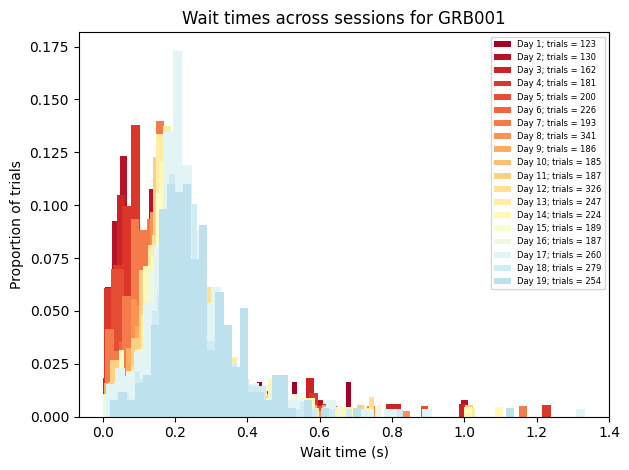

In [5]:
# Define a list of colors that follows a gradient from red to blue based on the number of days
colors = plt.colormaps['RdYlBu'].resampled(len(wait_time_diff))

# Set up the plot
fig, ax = plt.subplots()

# Iterate over the data and plot each histogram separately, assigning a color based on the day
for i, arr in enumerate(filter(lambda x: wait_times[x][0] != 0, range(len(wait_times)))):
    color = colors(i)
    ax.hist(actual_wait_times[arr], weights=np.ones(len(actual_wait_times[arr])) / len(actual_wait_times[arr]),
            bins=50, alpha=1, color=color, label=f"Day {i+1}; trials = {len(actual_wait_times[arr])}")

# Add figure details
ax.legend(fontsize=6)
ax.set_xlabel('Wait time (s)')
#ax.text(0.5, -0.19, '(observed wait time-required wait time)', transform=ax.transAxes, ha='center', fontsize=8)
ax.set_ylabel('Proportion of trials')
ax.set_title(f'Wait times across sessions for {animalID}')

# Create a ScalarMappable object for the colorbar
sm = plt.cm.ScalarMappable(cmap=colors)
sm.set_array(range(len(actual_wait_times)))

fig.tight_layout()

### Save figures

In [6]:
#figures_dir = '/home/gabriel/figures-code/chipmunk_behavior/figures/' #for linux
figures_dir = '/Users/gabriel/figures-code/chipmunk_behavior/figures/' #for mac
fig.savefig(f'{figures_dir}{animalID}_actual_wait_times.pdf', dpi=300)

## PMF fitting

In [18]:
#Choose which session to analyze
session_data_path = pick_files_multi_session('chipmunk', '*.h5')
session_data = pd.read_hdf(session_data_path[0])

### View session details

In [28]:
print('The session date is {0}.\n'.format(session_data_path[0].split('/')[5]))

ntrials = len(session_data)
print('The subject was doing the task for {0} trials.\n'.format(ntrials))  # the print function lets you display stuff, it is very useful for debugging 

ntrials_with_choice = len(session_data[session_data['outcome_record'].isin([0, 1])]) #no early withdrawals
print('Out of {0} trials, the subject made a choice in {1} trials.\n'.format(ntrials,ntrials_with_choice))

# unique_stim_intensities = np.sort(session_data.stim_intensity.unique()) # sort the intensities
# print('There are {0} stimuli conditions {1} Hz'.format(len(unique_stim_intensities),unique_stim_intensities))
freq_presented = set(len(trial_stim_events) for trial_stim_events in session_data.stimulus_event_timestamps)
print(f'There are {len(freq_presented)} stimuli conditions: {sorted(freq_presented)}')


The session date is 20230310_114829.

The subject was doing the task for 254 trials.

Out of 254 trials, the subject made a choice in 133 trials.

There are 5 stimuli conditions: [4, 8, 12, 16, 20]


### Plot performance vs. stimulus rate

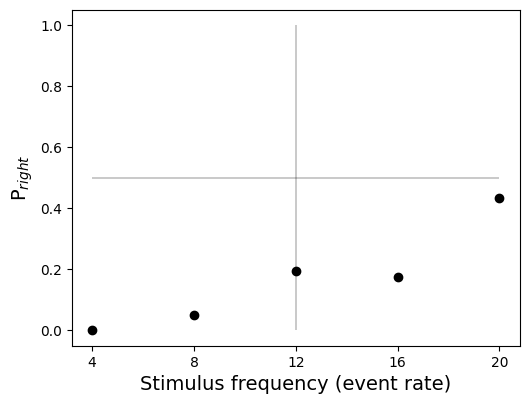

In [29]:
sel = session_data[session_data.response_side.isin([0,1])] # select only trials where the subject responded
sel = sel.reset_index(drop=True)
responded_right = np.array(sel.response_side == 1).astype(int) # select the response = 1 (i.e. the left side) and cast to integer datatype (number)   

rate_list = np.array([len(timestamps) for timestamps in sel.stimulus_event_timestamps])

frequencies = np.array(list(freq_presented))  # the stimulus intensity values
p_right = np.zeros_like(frequencies,dtype=float)     # pre-allocate the array (fill with zeros when you know the size)
# note that p_left is cast to float so it can take fractional numbers
# this is the part where we estimate the probability of left lick
for i,frequency in enumerate(frequencies):
    p_right[i] = np.sum(responded_right[rate_list == frequency])/np.count_nonzero(rate_list == frequency)

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(frequencies,p_right,'ko')
ax.set_xticks([4, 8, 12, 16, 20])

ax.vlines(12,0,1,color = 'k',lw = 0.3) # plot a vertical line as reference at zero
ax.hlines(0.5,np.min(frequencies),np.max(frequencies),color = 'k',lw = 0.3) # plot an horizontal line as reference for chance performance

ax.set_ylabel('P$_{right}$',fontsize = 14)  # set the y-axis label with latex nomenclature
ax.set_xlabel('Stimulus frequency (event rate)', fontsize = 14); # set the x-axis label

### Plot PMF fit

Estimated parameters: alpha 14.26 beta 0.19 gamma 0.00 lambda 0.55


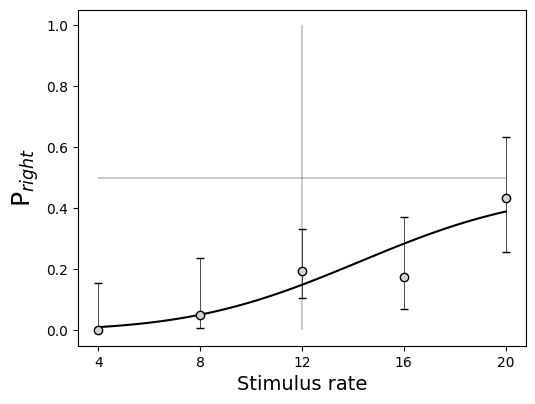

In [30]:
# first get the average points like above
frequencies = np.sort(np.array(list(freq_presented)).astype(float))
p_right = np.zeros_like(frequencies,dtype=float) 
ci_right = np.zeros((len(frequencies),2),dtype=float)

from statsmodels.stats.proportion import proportion_confint
for i,frequency in enumerate(frequencies):
    cnt = np.sum(responded_right[rate_list == frequency]) # number of times the subject licked left 
    nobs = np.count_nonzero(rate_list == frequency) # number of observations (ntrials)
    p_right[i] = cnt/nobs
    ci_right[i] = proportion_confint(cnt,nobs,method='wilson') # 95% confidence interval

def cumulative_gaussian(alpha,beta,gamma,lmbda, X):
    '''
    Evaluate the cumulative gaussian psychometric function.
       alpha is the bias (left or right)
       beta is the stepness
       gamma is the left handside offset
       lmbda is the right handside offset
      
    Adapted from the Palamedes toolbox 
    Joao Couto - Jan 2022    
    '''
        
    from scipy.special import erfc # import the complementary error function
    return  gamma + (1 - gamma - lmbda)*0.5*erfc(-beta*(X-alpha)/np.sqrt(2))+1e-9    

from scipy.optimize import minimize

def neg_log_likelihood_error(func, parameters, X, Y):
    '''
    Compute the log likelihood

    'func' is the (psychometric) function 
    'parameters' are the input parameters to 'func'
    'Y' is the binary response (correct = 1; incorrect=0)
    '''

    pX = func(*parameters, X)*0.99 + 0.005  # the predicted performance for X from the PMF
    # epsilon to prevent error in log(0)
    val = np.nansum(Y*np.log(pX) + (1-Y)*np.log(1-pX))
    return -1*val
#
rate_list = np.array(rate_list)
func = lambda pars: neg_log_likelihood_error(cumulative_gaussian, pars, rate_list.astype(float),responded_right.astype(float))
# x0 is the initial guess for the fit, it is an important parameter
x0 = [12.,0.1,p_right[0],1 - p_right[-1]]

bounds = [(frequencies[0],frequencies[-1]),(0.0001,10),(0,0.7),(0,0.7)]

res = minimize(func, x0, options = dict(maxiter = 500*len(x0),adaptive=True),
               bounds = bounds, method='Nelder-Mead') # method = 'L-BFGS-B',

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.vlines(12,0,1,color = 'k',lw = 0.3) # plot a vertical line as reference at zero
ax.hlines(0.5,np.min(frequencies),np.max(frequencies),color = 'k',lw = 0.3) # plot an horizontal line as reference for chance performance
ax.set_xticks([4, 8, 12, 16, 20])

# plot the fit
nx = np.linspace(np.min(frequencies),np.max(frequencies),100)
ax.plot(nx,cumulative_gaussian(*res.x,nx),'k')

# plot the observed data and confidence intervals
for i,e in zip(frequencies,ci_right):  # plot the confidence intervals
    ax.plot(i*np.array([1,1]),e,'_-',lw=0.5,color = 'black')
    
ax.plot(frequencies,p_right,'ko',markerfacecolor = 'lightgray',markersize = 6)

ax.set_ylabel('P$_{right}$',fontsize = 18)  # set the y-axis label with latex nomenclature
ax.set_xlabel('Stimulus rate', fontsize = 14); # set the x-axis label
print('Estimated parameters: alpha {0:2.2f} beta {1:2.2f} gamma {2:2.2f} lambda {3:2.2f}'.format(*res.x))


In [39]:
print(f'These are the frequencies: {frequencies}.\n')
print(f'These are the p_right values {p_right}.\n')
print(f'These are the 95% CI with Wilson: \n{ci_right}.\n')
print('The fit was done using a cummulative Gaussian function.\n')
print('alpha is the bias (left or right), beta is the stepness, gamma is the left handside offset, and lmbda is the right handside offset.\n')

These are the frequencies: [ 4.  8. 12. 16. 20.].

These are the p_right values [0.         0.05       0.19565217 0.17391304 0.43478261].

These are the 95% CI with Wilson: 
[[0.         0.15463902]
 [0.00888145 0.23613119]
 [0.1065061  0.33171259]
 [0.06978654 0.37137648]
 [0.25634635 0.63188625]].

The fit was done using a cummulative Gaussian function.

alpha is the bias (left or right), beta is the stepness, gamma is the left handside offset, and lmbda is the right handside offset.

